<a href="https://colab.research.google.com/github/rukhsarrasheed05-lab/ecommerce-unsupervised-analysis/blob/main/unspuervied_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()




Saving data.csv.zip to data.csv (1).zip


In [8]:
import pandas as pd

# Try specifying the encoding
df = pd.read_csv("/content/data.csv.zip", encoding='latin1')
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [21]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalSpent   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB
None


In [24]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalSpent,0


In [25]:
df = df.drop_duplicates()


In [20]:
# Summary statistics
print(df.describe())


            Quantity                    InvoiceDate      UnitPrice  \
count  401604.000000                         401604  401604.000000   
mean       12.183273  2011-07-10 12:08:23.848567552       3.474064   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-29 15:40:00       1.950000   
75%        12.000000            2011-10-20 11:58:30       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       250.283037                            NaN      69.764035   

          CustomerID     TotalSpent  
count  401604.000000  401604.000000  
mean    15281.160818      20.613638  
min     12346.000000 -168469.600000  
25%     13939.000000       4.250000  
50%     15145.000000      11.700000  
75%     16784.000000      19.800000  
max     18287.000000  168469.600000  
std      1714.006089     430.352218  


In [26]:
#Convert date column to datetime so you can calculate features like recency:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [23]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSpent
count,401604.000000,401604,401604.000000,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818,20.613638
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,4.250000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,11.700000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,250.283037,NaN,69.764035,1714.006089,430.352218


In [27]:
#Feature engineering: create useful features for unsupervised learning
# Total spent per transaction
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']

# Optional: extract day/month/year if needed
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day


In [28]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,InvoiceMonth,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1


Scaling / Normalization:
Even though no missing values exist, scaling is still important for K-Means, PCA, and anomaly detection:

In [29]:
from sklearn.preprocessing import StandardScaler

features = ['Quantity', 'UnitPrice', 'TotalSpent']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])


# **Task 2: Customer Segmentation using K-Means**


In [30]:
#Step 1: Aggregate Customer Data
# Assuming df is your cleaned dataset
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Aggregate at CustomerID level
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalSpent': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


Explanation:

Recency: How many days since the last purchase.

Frequency: How many invoices the customer made.

Monetary: Total amount spent

# **Step 3: Find Optimal Number of Clusters (Elbow Method & Silhouette Score)**

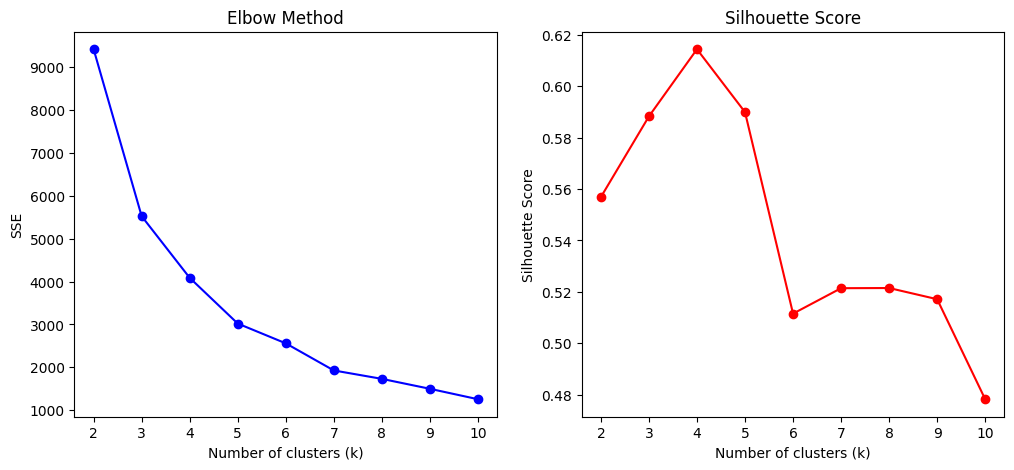

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

sse = []
sil_scores = []

K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared distances
    sil_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Plot SSE (Elbow Method)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


**Apply K-Means**

In [34]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


**Interpret Clusters**

In [35]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

print(cluster_summary)


        Recency Frequency  Monetary      
           mean      mean      mean count
Cluster                                  
0          10.8      28.6   12191.0   193
1         248.9       1.8     453.4  1077
2           5.1     109.9  124150.4    11
3          42.8       4.4    1317.3  3091


## **Visualize Clusters**

Since RFM has 3 features, we can use PCA to reduce to 2D for plotting:

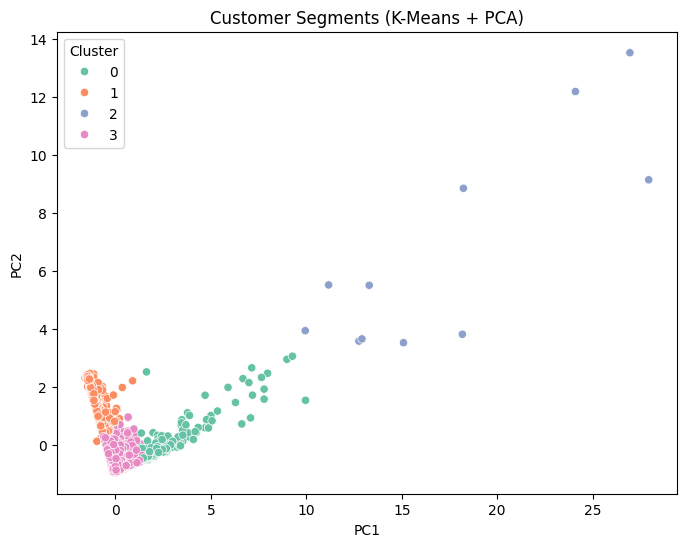

In [36]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm_pca[:,0], y=rfm_pca[:,1], hue=rfm['Cluster'], palette='Set2')
plt.title("Customer Segments (K-Means + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


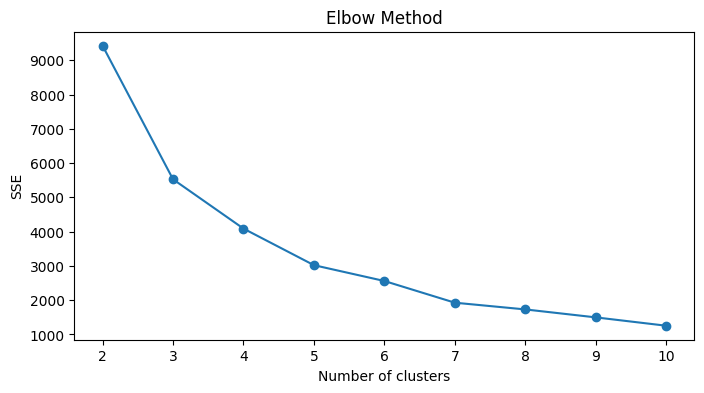

In [10]:
# Determine optimal clusters using Elbow Method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(2,11), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [32]:
# Apply K-Means with chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

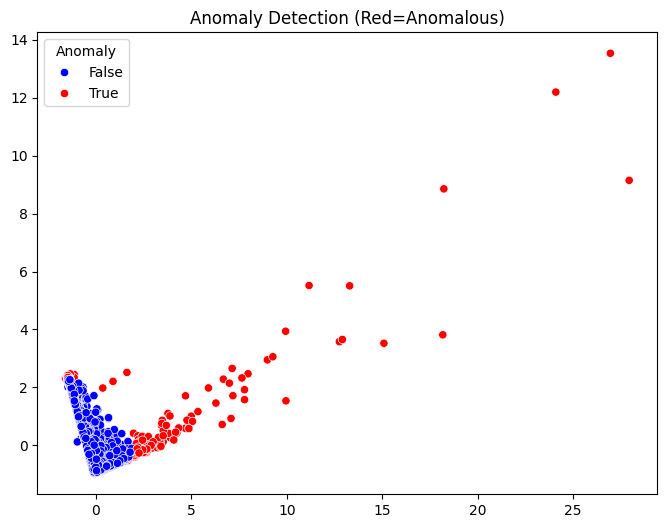

In [16]:
# =========================
# Task 3: Density Estimation & Anomaly Detection
# Fit KDE for anomaly detection
kde = KernelDensity(kernel='gaussian', bandwidth=1.0)
kde.fit(rfm_scaled)

# Compute scores
log_density = kde.score_samples(rfm_scaled)
rfm['Density'] = np.exp(log_density)

# Flag anomalies: low density customers
threshold = np.percentile(rfm['Density'], 5)
rfm['Anomaly'] = rfm['Density'] < threshold

plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm_pca[:,0], y=rfm_pca[:,1], hue=rfm['Anomaly'], palette={True:'red', False:'blue'})
plt.title("Anomaly Detection (Red=Anomalous)")
plt.show()

Explained Variance Ratio: [0.55972386 0.3007186 ]


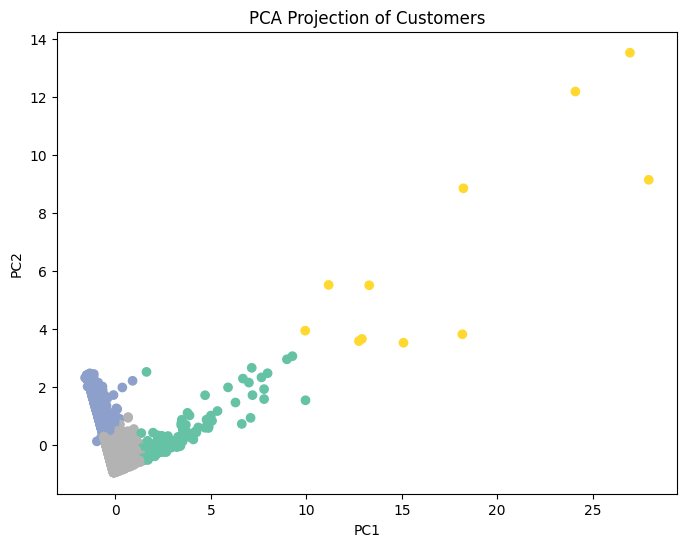

In [17]:
# Task 4: PCA Dimensionality Reduction
# =========================

pca_full = PCA(n_components=2)
rfm_pca2 = pca_full.fit_transform(rfm_scaled)

print("Explained Variance Ratio:", pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.scatter(rfm_pca2[:,0], rfm_pca2[:,1], c=rfm['Cluster'], cmap='Set2')
plt.title("PCA Projection of Customers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [18]:
# =========================
# Task 5: Collaborative Filtering Recommendation System
# =========================

# Create user-item matrix
user_item = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Sparse matrix
matrix = csr_matrix(user_item.values)

# Fit Nearest Neighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(matrix)

def recommend_products(customer_id, n_recommendations=5):
    idx = user_item.index.get_loc(customer_id)
    distances, indices = model.kneighbors(user_item.iloc[idx, :].values.reshape(1, -1), n_neighbors=6)

    recommended_ids = []
    for i in indices.flatten():
        if i != idx:
            recommended_ids.extend(user_item.columns[user_item.iloc[i,:] > 0])

    # Remove items already purchased
    purchased = user_item.iloc[idx,:][user_item.iloc[idx,:] > 0].index
    recommended = [item for item in recommended_ids if item not in purchased]

    return recommended[:n_recommendations]

# Sample recommendations for 3 customers
for cid in rfm['CustomerID'].sample(3, random_state=42):
    print(f"Recommendations for Customer {int(cid)}: {recommend_products(cid)}")


Recommendations for Customer 15079: ['22219', '21390', '22752', '23146', '23147']
Recommendations for Customer 12930: ['21136', '21171', '21181', '21714', '21755']
Recommendations for Customer 12956: ['22622', '23395', '23396', '72801C', '21340']


# **Density Estimation & Anomaly Detection**


In [37]:
from sklearn.neighbors import KernelDensity
import numpy as np

# Use scaled RFM features
X = rfm_scaled  # from Task 2

# Fit KDE
kde = KernelDensity(kernel='gaussian', bandwidth=1.0)  # bandwidth can be tuned
kde.fit(X)

# Compute log density scores for each customer
log_density = kde.score_samples(X)
rfm['Density'] = np.exp(log_density)  # higher density → normal, lower → anomaly


Explanation:

KDE estimates the probability density of each point.

Customers in low-density regions are unusual compared to the majority → anomalies.

**Flag Anomalous Customers**

In [38]:
# Define anomalies as bottom 5% of density
threshold = np.percentile(rfm['Density'], 5)
rfm['Anomaly'] = rfm['Density'] < threshold

# How many anomalies?
print("Number of anomalous customers:", rfm['Anomaly'].sum())


Number of anomalous customers: 219


**Explore Anomalies**

In [39]:
# Show anomalies
anomalies = rfm[rfm['Anomaly'] == True]
print(anomalies.head())


     CustomerID  Recency  Frequency   Monetary  Cluster   Density  Anomaly
55      12415.0       24         26  123725.45        2  0.000015     True
77      12441.0      367          1     173.55        1  0.008361     True
100     12471.0        2         49   18705.52        0  0.000227     True
103     12474.0       17         30    7064.77        0  0.002839     True
157     12540.0       20         19   13309.04        0  0.006550     True


# Visualize Normal vs Anomalous Customers

We can reuse PCA from Task 2 for 2D plotting:

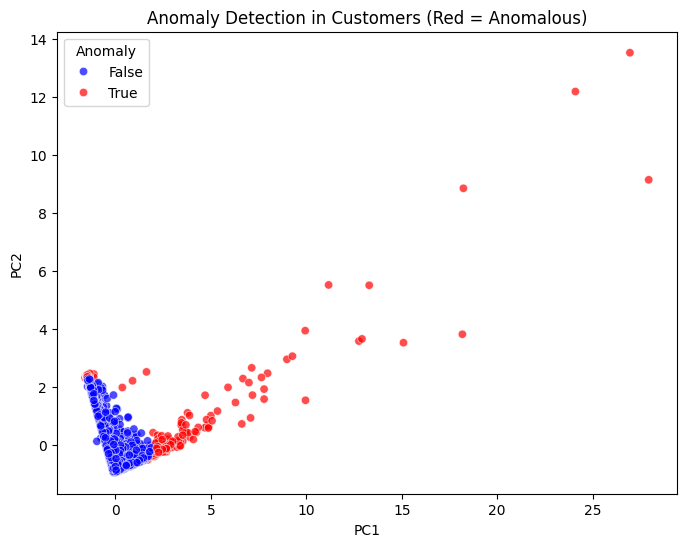

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA for visualization
pca = PCA(n_components=2)
rfm_pca2 = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=rfm_pca2[:,0],
    y=rfm_pca2[:,1],
    hue=rfm['Anomaly'],
    palette={False:'blue', True:'red'},
    alpha=0.7
)
plt.title("Anomaly Detection in Customers (Red = Anomalous)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Density-based approach (KDE) detects customers in low-density regions.

Anomalous customers are those whose purchasing behavior is unusual (e.g., extreme Monetary, Frequency, or Recency).

Visualization shows a clear separation of normal vs anomalous customers, helping the company identify potential fraud, VIPs, or dormant accounts.

# **Task 4 PCA (personal component analysis)**

In [41]:
#We already have scaled RFM features (rfm_scaled), which is perfect for PCA.
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Create a DataFrame for visualization
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'])
rfm_pca_df['Cluster'] = rfm['Cluster']  # optional: include cluster info
rfm_pca_df['Anomaly'] = rfm['Anomaly']  # optional: include anomaly info

rfm_pca_df.head()


,PC1,PC2,Cluster,Anomaly
0,-1.250425,1.972388,1,False
1,0.664949,-0.667276,3,False
2,-0.020667,-0.174909,3,False
3,-0.028780,-0.728086,3,False
4,-1.236358,1.828623,1,False


Compare Variance Before and After PCA

In [42]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each PC:", explained_variance)
print("Total variance captured by first 2 PCs:", explained_variance.sum())


Explained variance by each PC: [0.55972386 0.3007186 ]
Total variance captured by first 2 PCs: 0.8604424523165041


Explanation:

First 2 PCs capture 55% of the variance, so most of the original information is retained in 2D.

PCA reduces complexity while keeping the essential patterns intact

## **Visualize Clusters**

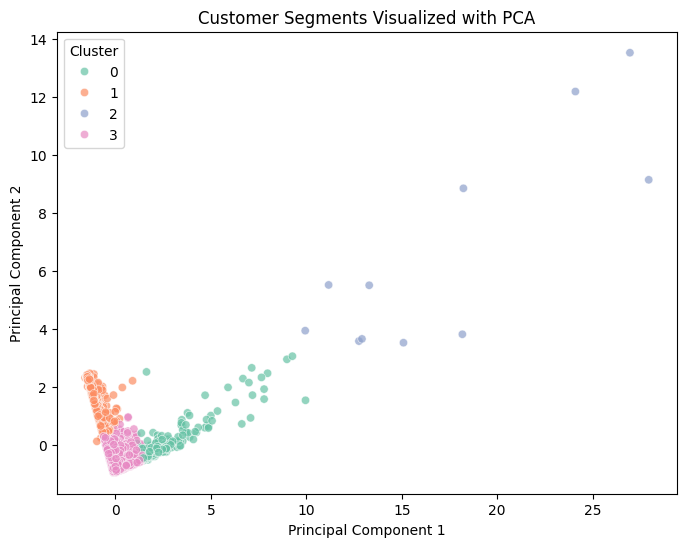

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    data=rfm_pca_df,
    palette='Set2',
    alpha=0.7
)
plt.title("Customer Segments Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


**Visualize Anomalies**

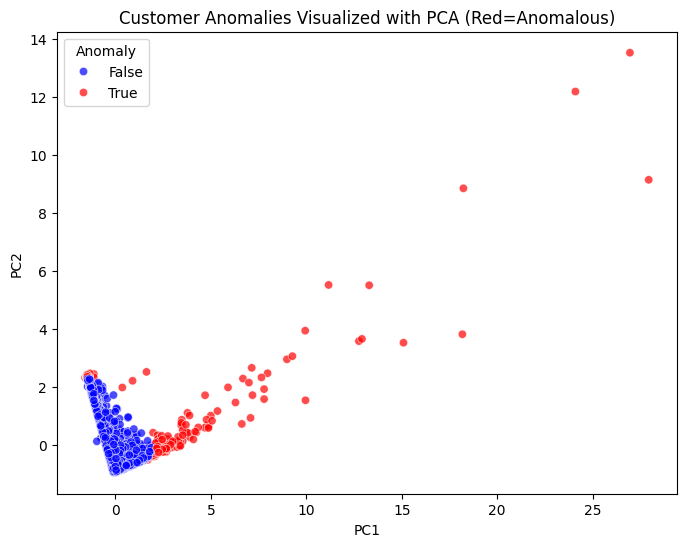

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Anomaly',
    data=rfm_pca_df,
    palette={False:'blue', True:'red'},
    alpha=0.7
)
plt.title("Customer Anomalies Visualized with PCA (Red=Anomalous)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# **Task 5: Recommendation System using Collaborative Filtering for this dataset. We’ll use a user-item matrix and Nearest Neighbors to recommend products.**

In [45]:
# Pivot table: rows = customers, columns = products, values = quantity purchased
user_item = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    fill_value=0
)

user_item.head()


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.25
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00


**Build a User-Based Collaborative Filtering Model**

In [46]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Convert to sparse matrix for efficiency
matrix = csr_matrix(user_item.values)

# Fit Nearest Neighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

**Create a Recommendation Function**

In [47]:
def recommend_products(customer_id, n_recommendations=5):
    # Get index of the customer
    idx = user_item.index.get_loc(customer_id)

    # Find similar users
    distances, indices = model.kneighbors(
        user_item.iloc[idx, :].values.reshape(1, -1),
        n_neighbors=6  # include self
    )

    # Collect products bought by similar users
    recommended_ids = []
    for i in indices.flatten():
        if i != idx:  # skip self
            recommended_ids.extend(user_item.columns[user_item.iloc[i,:] > 0])

    # Remove items already purchased
    purchased = user_item.iloc[idx,:][user_item.iloc[idx,:] > 0].index
    recommended = [item for item in recommended_ids if item not in purchased]

    # Return top n recommendations
    return recommended[:n_recommendations]


**Test Recommendations for 3 Sample Users**

In [48]:
# Sample 3 random customers
sample_customers = rfm['CustomerID'].sample(3, random_state=42)

for cid in sample_customers:
    print(f"\nRecommendations for Customer {int(cid)}: {recommend_products(cid)}")



Recommendations for Customer 15079: ['22219', '21390', '22752', '23146', '23147']

Recommendations for Customer 12930: ['21136', '21171', '21181', '21714', '21755']

Recommendations for Customer 12956: ['22622', '23395', '23396', '72801C', '21340']


Key Insights

The recommendation system identifies products the customer hasn’t bought yet.

It leverages similarities in purchase patterns, which is the core idea of collaborative filtering.

Useful for personalized marketing, cross-selling, and increasing customer engagement.